# In this notebook, we check important parts in the process of stimuli/sample generation.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('../stimulus_core/')
sys.path.append('../models_core/')
sys.path.append('../helper/')

import numpy as np
import random
import importlib
import glob
import os
import time
import matplotlib.pyplot as plt
import imageio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import clear_output
from time import sleep
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

import dynamics_3d as dn3d
import optical_signal as opsg
import flow_field as flfd
import helper_functions as hpfn
import get_Klapoetke_stimuli as gKs

# Flow field estimation

Here, we look at the flow field estimation using three types of stimuli: an expanding disk, a moving edge and a moving bar, all of which have constant edge velocities for any individual trajectories or movies.

## Expanding disk

In [2]:
def get_expanding_disk(K, L, pad, dt, v_deg):
    N = K * L
    ro = (N - 1) / 2.
    co = (N - 1) / 2.
    R = 2 * L
    v = (v_deg / 5) * L

    expanding_disk = []
    while R <= (N + 1) / 2:
        one_disk = gKs.get_one_disk(K, L, pad, ro, co, R)
        expanding_disk.append(one_disk)
        R = R + v * dt
    expanding_disk = np.array(expanding_disk)
    
    return expanding_disk

K = 12
L = 50
dt = 0.01
p = 1
pad = 2 * L
delay_dt = 0.03
v_deg = 10

expanding_disk = get_expanding_disk(K, L, pad, dt, v_deg)
print(f'The shape of the intensity is {expanding_disk.shape}')

# calculate the flow field
space_filter = flfd.get_space_filter(L/2, 4)
leftup_corners = opsg.get_leftup_corners(K, L, pad)
UV_flows = gKs.get_UV_flows(space_filter, K, L, pad, dt, delay_dt, leftup_corners, expanding_disk)
print(f'The shape of the UV_flows is {UV_flows.shape}')

The shape of the intensity is (201, 1, 800, 800)
The shape of the UV_flows is (201, 1, 144, 4)


In [11]:
def animation_by_clear_output(img_roll, interval=10, sleep_time=0):
    T = len(img_roll)
    v_max = np.abs(img_roll).max()
    
    plt.figure()
    for t in range(0, T, interval):
        plt.imshow(img_roll[t], 'gray_r', vmin=-v_max, vmax=v_max)
        plt.show()
        sleep(sleep_time)
        clear_output(wait=True)

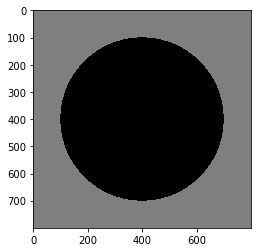

In [4]:
# visualize the intensity flow and flow field
img_roll = np.squeeze(expanding_disk)
animation_by_clear_output(img_roll)

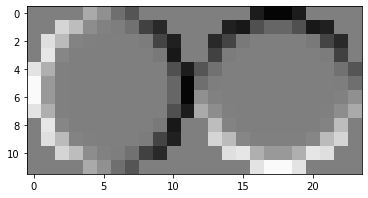

In [5]:
# visualize the flow field, left: horizontal, right: vertical.
T = UV_flows.shape[0]
cf_uvs = []
for t in range(T):
    cf_u, cf_v = flfd.set_flow_fields_on_frame(UV_flows[t], leftup_corners, K, L, pad)
    cf_uvs.append(np.concatenate((np.squeeze(cf_u), np.squeeze(cf_v)), axis=1))
cf_uvs = np.array(cf_uvs)

img_roll = cf_uvs
animation_by_clear_output(img_roll)

## Moving bar

In [177]:
def get_moving_bar(K, L, pad, dt, v_deg):
    N = K * L
    ro = (N - 1) / 2.
    co = -L
    theta_a = np.pi * 0
    L1 = L * 1
    L2 = (N - 1) / 2.
    L3 = L * 1
    L4 = (N - 1) / 2.
    v = (v_deg / 5) * L 
    
    moving_bar = []
    while co <= N + L:
        one_bar = gKs.get_one_bar(K, L, pad, ro, co, theta_a, L1, L2, L3, L4)
        moving_bar.append(one_bar)
        co = co + v * dt
    moving_bar = np.array(moving_bar)
    
    return moving_bar

K = 12
L = 4
dt = 0.01
p = 1
pad = 2 * L
delay_dt = 0.03
v_deg = 20

moving_bar = get_moving_bar(K, L, pad, dt, v_deg)
print(f'The shape of the intensity is {moving_bar.shape}')

# calculate the flow field
space_filter = flfd.get_space_filter(L/2, 4)
leftup_corners = opsg.get_leftup_corners(K, L, pad)
UV_flows = gKs.get_UV_flows(space_filter, K, L, pad, dt, delay_dt, leftup_corners, moving_bar)
print(f'The shape of the UV_flows is {UV_flows.shape}')

The shape of the intensity is (351, 1, 64, 64)
The shape of the UV_flows is (351, 1, 144, 4)


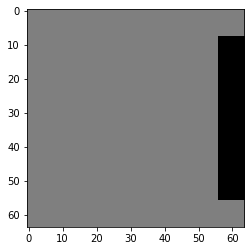

In [178]:
# visualize the intensity flow and flow field
img_roll = np.squeeze(moving_bar)
animation_by_clear_output(img_roll)

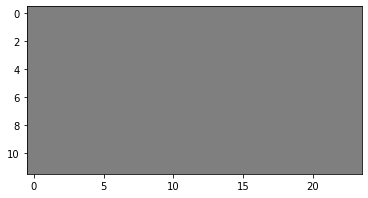

In [119]:
# visualize the flow field, left: horizontal, right: vertical.
T = UV_flows.shape[0]
cf_uvs = []
for t in range(T):
    cf_u, cf_v = flfd.set_flow_fields_on_frame(UV_flows[t], leftup_corners, K, L, pad)
    cf_uvs.append(np.concatenate((np.squeeze(cf_u), np.squeeze(cf_v)), axis=1))
cf_uvs = np.array(cf_uvs)

img_roll = cf_uvs
animation_by_clear_output(img_roll)

## Moving edge

In [169]:
importlib.reload(gKs)

def get_moving_edge(K, L, pad, dt, v_deg):
    N = K * L
    ro = (N - 1) / 2.
    co = -L
    theta_a = np.pi * 0
    L1 = 0
    L2 = (N - 1) / 2.
    L3 = 0
    L4 = (N - 1) / 2.
    v = (v_deg / 5) * L
    
    moving_edge = []
    while L1 <= N - co:
        one_bar = gKs.get_one_bar(K, L, pad, ro, co, theta_a, L1, L2, L3, L4)
        moving_edge.append(one_bar)
        L1 = L1 + v * dt
    moving_edge = np.array(moving_edge)
    
    return moving_edge


K = 12
L = 4
dt = 0.001
p = 1
pad = 2 * L
delay_dt = 0.03
v_deg = 501

moving_edge = get_moving_edge(K, L, pad, dt, v_deg)
print(f'The shape of the intensity is {moving_edge.shape}')

# calculate the flow field
space_filter = flfd.get_space_filter(L/2, 4)
leftup_corners = opsg.get_leftup_corners(K, L, pad)
UV_flows = gKs.get_UV_flows(space_filter, K, L, pad, dt, delay_dt, leftup_corners, moving_edge)
print(f'The shape of the UV_flows is {UV_flows.shape}')

The shape of the intensity is (130, 1, 64, 64)
The shape of the UV_flows is (130, 1, 144, 4)


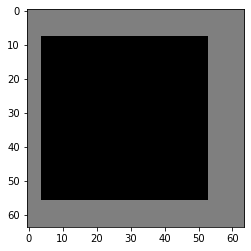

In [171]:
# visualize the intensity flow and flow field
img_roll = np.squeeze(moving_edge)
animation_by_clear_output(img_roll)

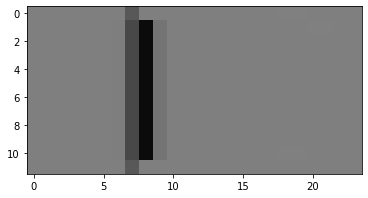

In [173]:
# visualize the flow field, left: horizontal, right: vertical.
T = UV_flows.shape[0]
cf_uvs = []
for t in range(T):
    cf_u, cf_v = flfd.set_flow_fields_on_frame(UV_flows[t], leftup_corners, K, L, pad)
    cf_uvs.append(np.concatenate((np.squeeze(cf_u), np.squeeze(cf_v)), axis=1))
cf_uvs = np.array(cf_uvs)

img_roll = cf_uvs
animation_by_clear_output(img_roll)

## Summary of tuning curves

In [183]:
# Need to run tuning_curve.py first
L = 50
v_deg_list = range(5, 2001, 5)
save_path = '/Volumes/Baohua/data_on_hd/loom/hrc_tuning/'

## Delta filter
# Expanding disk
ED_delta_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'expanding_disk_delta/UV_flow_L{L}_v_{v_deg}_delta.npy')
    ED_delta_average.append(UV_flows[UV_flows > 0].mean())
    
    if v_deg == 800:
        ED_delta_800 = UV_flows
    
# Moving bar
MB_delta_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'moving_bar_delta/UV_flow_L{L}_v_{v_deg}_delta.npy')
    MB_delta_average.append(UV_flows[UV_flows > 0].mean())
    
# Moving edge
ME_delta_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'moving_edge_delta/UV_flow_L{L}_v_{v_deg}_delta.npy')
    ME_delta_average.append(UV_flows[UV_flows > 0].mean())
    
## Exponential filter
# Expanding disk
ED_exp_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'expanding_disk_exp/UV_flow_L{L}_v_{v_deg}_exp.npy')
    ED_exp_average.append(UV_flows[UV_flows > 0].mean())
    
# Moving bar
MB_exp_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'moving_bar_exp/UV_flow_L{L}_v_{v_deg}_exp.npy')
    MB_exp_average.append(UV_flows[UV_flows > 0].mean())
    
# Moving edge
ME_exp_average = []
for v_deg in v_deg_list:
    UV_flows = np.load(save_path+\
                       f'moving_edge_exp/UV_flow_L{L}_v_{v_deg}_exp.npy')
    ME_exp_average.append(UV_flows[UV_flows > 0].mean())

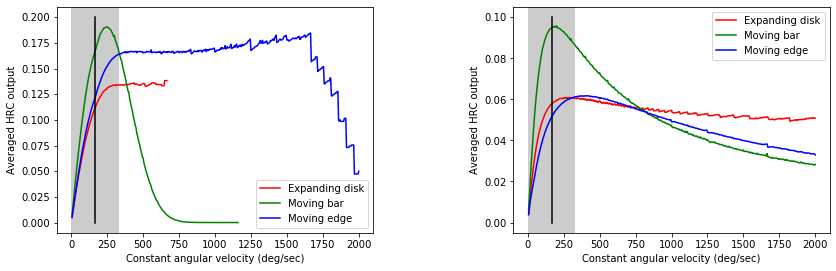

In [287]:
# HRC tuning curve
def get_angular_velocity(R, v, theta_b):
    theta_b_dot = 2. * v / R * np.sin(theta_b/2) * np.tan(theta_b/2) * (180/np.pi)
    return theta_b_dot

R = 1
L = 50
theta_b = np.pi/3
theta_b_dot_max = get_angular_velocity(R, 10, theta_b)
theta_b_dot_min = get_angular_velocity(R, 2, theta_b)

fig = plt.figure(figsize=(15, 5))
gs0 = gridspec.GridSpec(1, 2, figure=fig)

# Delta filter
gs00 = gridspec.GridSpecFromSubplotSpec(12, 12, subplot_spec=gs0[0, 0])
ax = fig.add_subplot(gs00[1:11, 1:11])
ax.axvspan(0, theta_b_dot_max, alpha=0.2, edgecolor=None, facecolor='k')
ax.set_xlabel('Constant angular velocity (deg/sec)')
ax.set_ylabel('Averaged HRC output')
ax.plot(v_deg_list, ED_delta_average, 'r')
ax.plot(v_deg_list, MB_delta_average, 'g')
ax.plot(v_deg_list, ME_delta_average, 'b')
ax.plot([5/0.03, 5/0.03], [0, 0.2], 'k')
ax.legend(['Expanding disk', 'Moving bar', 'Moving edge'])

# Exponential filter
gs00 = gridspec.GridSpecFromSubplotSpec(12, 12, subplot_spec=gs0[0, 1])
ax = fig.add_subplot(gs00[1:11, 1:11])
ax.axvspan(0, theta_b_dot_max, alpha=0.2, edgecolor=None, facecolor='k')
ax.set_xlabel('Constant angular velocity (deg/sec)')
ax.set_ylabel('Averaged HRC output')
ax.plot(v_deg_list, ED_exp_average, 'r')
ax.plot(v_deg_list, MB_exp_average, 'g')
ax.plot(v_deg_list, ME_exp_average, 'b')
ax.plot([5/0.03, 5/0.03], [0, 0.1], 'k')
ax.legend(['Expanding disk', 'Moving bar', 'Moving edge'])

plt.show()

# Use Angle to determine the existance of a signal

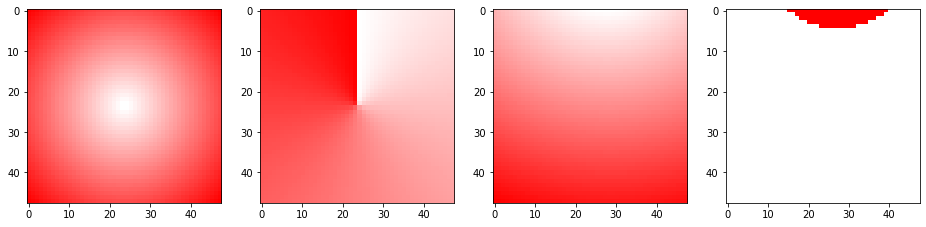

In [9]:
%matplotlib inline

importlib.reload(opsg)
importlib.reload(flfd)
importlib.reload(hpfn)


theta_r = np.pi/6
K = 12
L = 4
N = K*L # Size of each frame, the additional 4*L is for spatial filtering and will be deleted afterwards.
coord_y = np.arange(N) - (N-1)/2.
coord_x = np.arange(N) - (N-1)/2.
coords_y, coords_x = np.meshgrid(coord_y, -coord_x) # coordinates of each point in the frame
dm = np.sqrt(coords_y**2 + coords_x**2) # distance matrix
R = 1.
x, y, z = [2, 0.2, 2]
ball_center = np.array([x, y, z])

theta_matrix, phi_matrix = opsg.get_angle_matrix(theta_r, coords_x, coords_y, dm, K, L)
coord_matrix = opsg.get_coord_matrix(phi_matrix, theta_matrix, D=1.)
angle_matrix_b = opsg.get_angle_matrix_b(coord_matrix, ball_center)

theta_b = opsg.get_angular_size(x, y, z, R)
ball_image = angle_matrix_b<=theta_b
colormap_ = LinearSegmentedColormap.from_list('wr', ['w', 'r'], N=256)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(theta_matrix, colormap_)
axes[1].imshow(phi_matrix, colormap_)
axes[2].imshow(angle_matrix_b, colormap_)
axes[3].imshow(ball_image, colormap_)

plt.show()

# Distribution of LPLC2 units

In [3]:
importlib.reload(dn3d)

D = 1
lplc2_units_coords2 = []
lplc2_units = np.array([[1, 0], [0, 1.3], [1, -1], [2, 1.5]])
for ii in range(4):
    phi_s = lplc2_units[ii, 0]
    theta_s = lplc2_units[ii, 1]
    lplc2_units_coords2.append(dn3d.get_coord(D, phi_s, theta_s))
lplc2_units_coords2 = np.array(lplc2_units_coords2)

In [4]:
%matplotlib widget

_, lplc2_units_coords = opsg.get_lplc2_units(4, randomize=False)
print(lplc2_units_coords.shape)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(lplc2_units_coords[:, 0], lplc2_units_coords[:, 1], lplc2_units_coords[:, 2], c='r', marker='.')
ax.scatter(lplc2_units_coords2[:, 0], lplc2_units_coords2[:, 1], lplc2_units_coords2[:, 2], c='b', marker='.')
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)
# ax.set_zlim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(4, 3)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'z')

In [59]:
%matplotlib widget

importlib.reload(opsg)
importlib.reload(hpfn)

# Here we want to change the label of axis: x vertical, z to the right, 
# and y should choose the direction that completes a right coordiantes.

M = 256
N = 12*10
lplc2_units = opsg.get_lplc2_units_xy_angles(M)
_, lplc2_units_coords = opsg.get_lplc2_units(M)

pos_x = np.array([[0.2, 0, 0]])
pos_y = np.array([[0, 0.2, 0]])
pos_z = np.array([[0, 0, 0.2]])
pos_rots_x = []
pos_rots_y = []
pos_rots_z = []
for m in range(M):
    angle = lplc2_units[m]
    pos_rot_x = opsg.get_rotated_axes(angle, pos_x)
    pos_rot_y = opsg.get_rotated_axes(angle, pos_y, rev=True)
    pos_rot_z = opsg.get_rotated_axes(angle, pos_z)
    pos_rots_x.append(pos_rot_x[0])
    pos_rots_y.append(pos_rot_y[0])
    pos_rots_z.append(pos_rot_z[0])
pos_rots_x = np.array(pos_rots_x)
pos_rots_y = np.array(pos_rots_y)
pos_rots_z = np.array(pos_rots_z)

_, lplc2_units_coords = opsg.get_lplc2_units(M)
print(lplc2_units_coords.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# global coordinate, 
ax.quiver([0], [0], [0], [0], [0], [1.2], length=2, arrow_length_ratio = 0.1, color='k')
ax.quiver([0], [0], [0], [0], [1.2], [0], length=2, arrow_length_ratio = 0.1, color=[0.5, 0.5, 0.5])
ax.quiver([0], [0], [0], [1.2], [0], [0], length=2, arrow_length_ratio = 0.1, color=[0.5, 0.5, 0.5])

# centers of the lplc2 units
for m in range(M):
    coord_m = lplc2_units_coords[m]
    angle = opsg.get_angle_two_vectors(np.array([1, 1, 1]), coord_m[::-1])
    if angle > np.pi/2.:
        ax.scatter(lplc2_units_coords[m, 2], lplc2_units_coords[m, 1], lplc2_units_coords[m, 0], s=4, c='r')
#         ax.plot([0, lplc2_units_coords[m, 2]], [0, lplc2_units_coords[m, 1]], [0, lplc2_units_coords[m, 0]], c='r', linestyle='-', linewidth=0.5, alpha=0.3)
    else:
        ax.scatter(lplc2_units_coords[m, 2], lplc2_units_coords[m, 1], lplc2_units_coords[m, 0], s=4, c='r', alpha=0.1)
#         ax.plot([0, lplc2_units_coords[m, 2]], [0, lplc2_units_coords[m, 1]], [0, lplc2_units_coords[m, 0]], c='r', linestyle='-', linewidth=0.5, alpha=0.1)

# local x
for m in range(M):
    coord_m = lplc2_units_coords[m]
    angle = opsg.get_angle_two_vectors(np.array([1, 1, 1]), coord_m[::-1])
    if angle > np.pi/2.:
        x = lplc2_units_coords[m, 0]
        y = lplc2_units_coords[m, 1]
        z = lplc2_units_coords[m, 2]
        u = pos_rots_x[m, 0]
        v = pos_rots_x[m, 1]
        w = pos_rots_x[m, 2]
        ax.quiver(z, y, x, w, v, u, length=1, arrow_length_ratio = 0.5, color='k')

# # local y
# x = lplc2_units_coords[:, 0]
# y = lplc2_units_coords[:, 1]
# z = lplc2_units_coords[:, 2]
# u = pos_rots_y[:, 0]
# v = pos_rots_y[:, 1]
# w = pos_rots_y[:, 2]
# ax.quiver(x, y, z, u, v, w, length=0.8, color=[0.5, 0.5, 0.5])

# local z
for m in range(M):
    coord_m = lplc2_units_coords[m]
    angle = opsg.get_angle_two_vectors(np.array([1, 1, 1]), coord_m[::-1])
    if angle > np.pi/2.:
        x = lplc2_units_coords[m, 0]
        y = lplc2_units_coords[m, 1]
        z = lplc2_units_coords[m, 2]
        u = pos_rots_z[m, 0]
        v = pos_rots_z[m, 1]
        w = pos_rots_z[m, 2]
        ax.quiver(z, y, x, w, v, u, length=1, arrow_length_ratio = 0.5, color=[0.5, 0.5, 0.5])




# for m in range(M):
#     x = np.array([lplc2_units_coords[m, 0], lplc2_units_coords[m, 0]+pos_rots_x[m, 0]])
#     y = np.array([lplc2_units_coords[m, 1], lplc2_units_coords[m, 1]+pos_rots_x[m, 1]])
#     z = np.array([lplc2_units_coords[m, 2], lplc2_units_coords[m, 2]+pos_rots_x[m, 2]])
#     ax.plot(x, y, z, 'r') 
#     x = np.array([lplc2_units_coords[m, 0], lplc2_units_coords[m, 0]+pos_rots_y[m, 0]])
#     y = np.array([lplc2_units_coords[m, 1], lplc2_units_coords[m, 1]+pos_rots_y[m, 1]])
#     z = np.array([lplc2_units_coords[m, 2], lplc2_units_coords[m, 2]+pos_rots_y[m, 2]])
#     ax.plot(x, y, z, 'r') 
#     x = np.array([lplc2_units_coords[m, 0], lplc2_units_coords[m, 0]+pos_rots_z[m, 0]])
#     y = np.array([lplc2_units_coords[m, 1], lplc2_units_coords[m, 1]+pos_rots_z[m, 1]])
#     z = np.array([lplc2_units_coords[m, 2], lplc2_units_coords[m, 2]+pos_rots_z[m, 2]])
#     ax.plot(x, y, z, 'r') 

# N=100
# stride=1
# rr = 0.9
# u = np.linspace(0, 2 * np.pi, N)
# v = np.linspace(0, np.pi, N)
# x = rr * np.outer(np.cos(u), np.sin(v))
# y = rr * np.outer(np.sin(u), np.sin(v))
# z = rr * np.outer(np.ones(np.size(u)), np.cos(v))
# ax.plot_surface(z, y, x, linewidth=0.0, cstride=stride, rstride=stride, alpha=1)
    
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(1.2, -1.2)
ax.set_zlim(-1.2, 1.2)
ax.set_xlabel('z')
ax.set_ylabel('y')
ax.set_zlabel('x')
ax.set_axis_off()

(256, 3)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 2d map projection

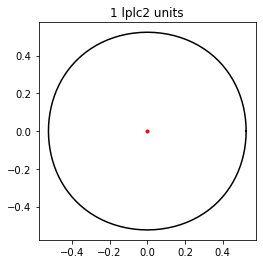

In [246]:
%matplotlib inline

importlib.reload(hpfn)

M = 1
lplc2_units = opsg.get_lplc2_units_xy_angles(M)
# _, lplc2_units_coords = opsg.get_lplc2_units(M)

N = 100
mc = 0
angle_mc = lplc2_units[mc]
angle_r = np.pi/6.

fig = plt.figure()
for m in range(M):
    angle_m = lplc2_units[m]
    angles_on_map = hpfn.get_projection_one_unit(angle_mc, angle_m, angle_r, N)
    plt.scatter(angles_on_map[0][0], angles_on_map[0][1], c='r', marker='.')
    if m == mc:
        segments_list = hpfn.get_segments(angles_on_map[3:])
        for segment in segments_list:
            plt.plot(segment[:, 0], segment[:, 1], c='k')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('{} lplc2 units'.format(M))        
plt.show()

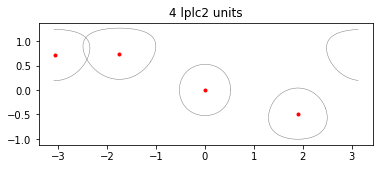

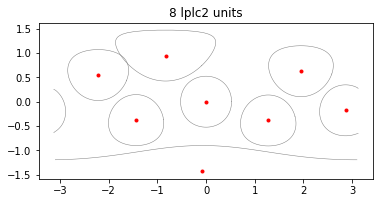

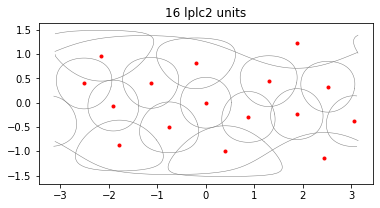

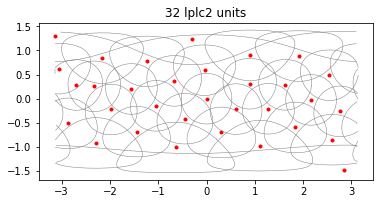

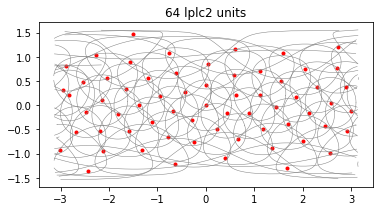

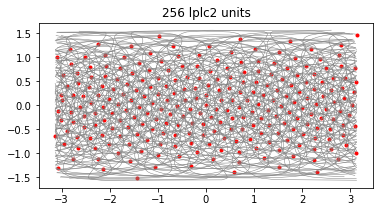

In [55]:
%matplotlib inline

importlib.reload(hpfn)

N = 100
mc = 1
angle_r = np.pi/6

for M in [4, 8, 16, 32, 64, 256]:
    lplc2_units = opsg.get_lplc2_units_xy_angles(M)
    _, lplc2_units_coords = opsg.get_lplc2_units(M)
    angle_mc = lplc2_units[mc]

    fig = plt.figure()
    for m in range(M):
        angle_m = lplc2_units[m]
        angles_on_map = hpfn.get_projection_one_unit(angle_mc, angle_m, angle_r, N)
        plt.scatter(angles_on_map[0][0], angles_on_map[0][1], c='r', marker='.')
        segments_list = hpfn.get_segments(angles_on_map[3:])
        for segment in segments_list:
            plt.plot(segment[:, 0], segment[:, 1], c=[0.5, 0.5, 0.5], linewidth=0.5)
    plt.title('{} lplc2 units'.format(M))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
#     fig.savefig(figure_path+'projection_{}.pdf'.format(M), bbox_inches='tight')

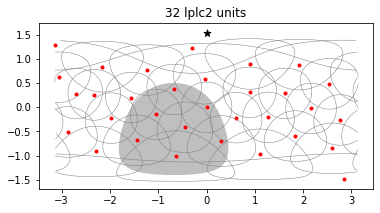

In [282]:
%matplotlib inline

importlib.reload(hpfn)

N = 100
mc = 1
angle_r = np.pi/6
angle_np = np.array([0., np.pi/2])
traj = np.array([[[-0.5, -0.5, -1]]])

for M in [32]:
    fig = plt.figure()
    
    lplc2_units = opsg.get_lplc2_units_xy_angles(M)
    _, lplc2_units_coords = opsg.get_lplc2_units(M)
    angle_mc = lplc2_units[mc]
    R = 1
    P = len(traj[0])
    for p in range(P):
        x, y, z = traj[0, p, :]
        angle_rb = opsg.get_angular_size(x, y, z, R)
        angle_b = opsg.get_xy_angles(x, y, z) 
        angles_on_map_b = hpfn.get_projection_one_unit(angle_mc, angle_b, angle_rb, N)
        segments_list_b = hpfn.get_segments(angles_on_map_b[3:])
        for segment in segments_list_b:
            if angles_on_map_b[2][1]+angle_rb > np.pi/2:
                plt.fill_between(segment[:, 0], segment[:, 1], np.ones_like(segment[:, 0])*np.pi/2, \
                                 facecolor=[0.5, 0.5, 0.5], edgecolor=None, alpha=0.5)
            elif angles_on_map_b[2][1]-angle_rb < -np.pi/2:
                plt.fill_between(segment[:, 0], segment[:, 1], -np.ones_like(segment[:, 0])*np.pi/2, \
                                 facecolor=[0.5, 0.5, 0.5], edgecolor=None, alpha=0.5)
            else:
                plt.fill_between(segment[:, 0], segment[:, 1], facecolor=[0.5, 0.5, 0.5], edgecolor=None, alpha=0.5)
#         for segment in segments_list_b:
#             plt.plot(segment[:, 0], segment[:, 1], linewidth=4.)
    for m in range(M):
        angle_m = lplc2_units[m]
        angles_on_map = hpfn.get_projection_one_unit(angle_mc, angle_m, angle_r, N)
        plt.scatter(angles_on_map[0][0], angles_on_map[0][1], c='r', marker='.')
        segments_list = hpfn.get_segments(angles_on_map[3:])
        for segment in segments_list:
            plt.plot(segment[:, 0], segment[:, 1], c=[0.5, 0.5, 0.5], linewidth=0.5)
    # Add north pole
    angles_np_on_map = hpfn.get_projection_one_unit(angle_mc, angle_np, angle_r, N)
    plt.scatter(angles_np_on_map[2][0], angles_np_on_map[2][1], s=50, c='k', marker='*')
    
    plt.title('{} lplc2 units'.format(M))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
#     fig.savefig(figure_path+'projection_{}.pdf'.format(M), bbox_inches='tight')

# Rotation scene generation

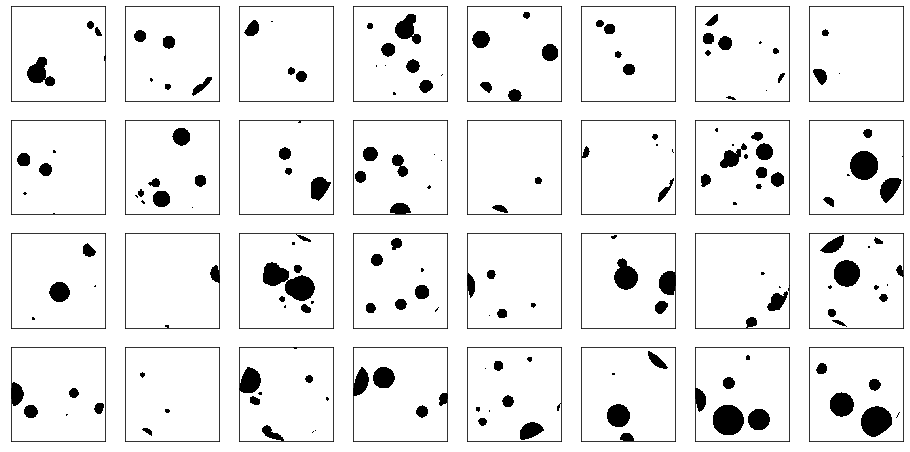

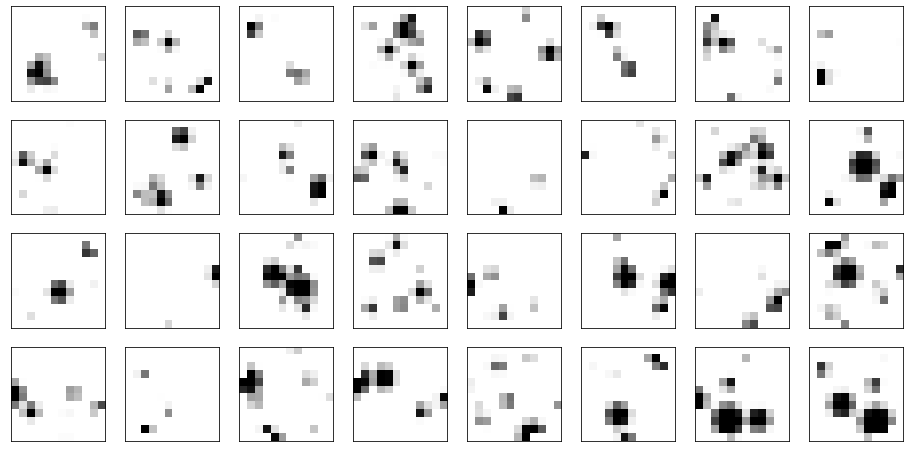

In [57]:
%matplotlib inline

importlib.reload(opsg)
importlib.reload(hpfn)

M = 32 # number of lplc2 units
K = 12 
L = 20
pad = 2*L
theta_r = np.deg2rad(30)
P = 100 # number of balls
sigma = 0
D_max = 15
D_min = 5
R_rot = 1
cf, intensity_cg, hit = hpfn.generate_rotation_scene(M, K, L, pad, theta_r, P, sigma, D_max, D_min, R_rot)

fig = plt.figure(figsize=(16, 2*M/8))
for m in range(M):
    plt.subplot(np.int(M/8), 8, m+1)
    plt.imshow(cf[m, :, :], cmap='gray_r', alpha=1.)
    plt.xticks([])
    plt.yticks([])
    
fig = plt.figure(figsize=(16, 2*M/8))
for m in range(M):
    plt.subplot(np.int(M/8), 8, m+1)
    plt.imshow(intensity_cg[m].reshape((K, K)), cmap='gray_r', alpha=1.)
    plt.xticks([])
    plt.yticks([])

mean_contrast = []
for m in range(M):
    mean_contrast.append(intensity_cg[m].sum()/(K)**2)

In [51]:
mean_contrast_05_cg = mean_contrast

In [52]:
print(np.mean(mean_contrast_old), np.std(mean_contrast_old))
print(np.mean(mean_contrast_40), np.std(mean_contrast_40))
print(np.mean(mean_contrast_30), np.std(mean_contrast_30))
print(np.mean(mean_contrast_05), np.std(mean_contrast_05))
print(np.mean(mean_contrast_04), np.std(mean_contrast_04))
print(np.mean(mean_contrast_04_cg), np.std(mean_contrast_04_cg))
print(np.mean(mean_contrast_03), np.std(mean_contrast_03))

0.08684407552083333 0.06175478861895238
0.07423990885416666 0.05052726517351403
0.1178244357638889 0.05715150999875338
0.1423030598958333 0.07918806363002509
0.08892469618055555 0.055131068888256786
0.07747016221077906 0.05166555220922608
0.048358289930555555 0.036725135434381405


# Trajectories and distances

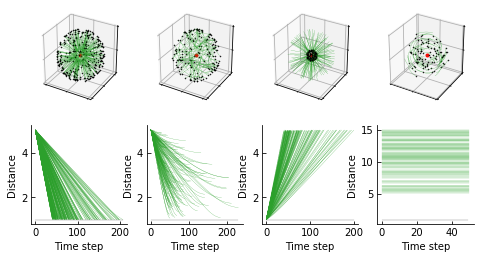

In [18]:
fig = plt.figure(figsize=(10,4))
gs0 = gridspec.GridSpec(2, 5, figure=fig)

label_fontsize = 10
title_fontsize = 10
tick_fontsize = 10

## trajectories
set_number = 1002
data_path = '/Volumes/Baohua/data_on_hd/loom/multi_lplc2_scal200_D5/set_{}/'.format(set_number)+'other_info/'
line_color = 'tab:green'
line_width = 0.2
n0 = 4
data_types = ['hit','miss','retreat','rotation']
for ind1,data_type in enumerate(data_types):
    gs00 = gridspec.GridSpecFromSubplotSpec(9,9,subplot_spec=gs0[0,ind1])
    ax = fig.add_subplot(gs00[:, :],projection='3d')
    if data_type != 'rotation':
        ax.plot([0],[0],[0],'r.',markersize=6) 
        path_full = data_path+data_type+'/trajectories/'
        files = glob.glob(path_full+'*.npy')
        for ind2,file in enumerate(files):
            if ind2%n0 == 0:
                rn_arrs = np.load(file,allow_pickle=True)
                for rn_arr in rn_arrs:
                    rn_arr = np.array(rn_arr)
                    P = rn_arr.shape[1]
                    for p in range(P):
                        ax.plot(rn_arr[:,p,0],rn_arr[:,p,1],rn_arr[:,p,2],c=line_color,linewidth=line_width)
                        ax.plot(rn_arr[0:1,p,0],rn_arr[0:1,p,1],rn_arr[0:1,p,2],marker='.',markersize=1,markeredgecolor='k',markerfacecolor='k') 
#         ax.set_title(data_type,fontsize=title_fontsize)
        ax.set_xticks([-5,0,5])
        ax.set_yticks([-5,0,5])
        ax.set_zticks([-5,0,5])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
#         ax.set_xlabel('x',fontsize = label_fontsize)
#         ax.set_ylabel('y',fontsize = label_fontsize)
#         ax.set_zlabel('z',fontsize = label_fontsize)
        ax.tick_params(direction='in',labelsize=0)
#         ax.set_axis_off()
    elif data_type == 'rotation':
        path_full = data_path+data_type+'/trajectories/'
        files = glob.glob(path_full+'*.npy')
        rn_arrs = np.load(files[22],allow_pickle=True)
        rn_arr = np.array(rn_arrs[2])
        P = rn_arr.shape[1]
        ax.plot([0],[0],[0],'r.',markersize=6) 
        for p in range(P):
            if p%1 == 0:
                ax.plot(rn_arr[:,p,0],rn_arr[:,p,1],rn_arr[:,p,2],c=line_color,linewidth=line_width)
                ax.plot(rn_arr[0:1,p,0],rn_arr[0:1,p,1],rn_arr[0:1,p,2],marker='.',markersize=1,markeredgecolor='k',markerfacecolor='k')    
#         ax.set_title(data_type,fontsize=title_fontsize)
        ax.set_xticks([-15,0,15])
        ax.set_yticks([-15,0,15])
        ax.set_zticks([-15,0,15])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
#         ax.set_xlabel('x',fontsize = label_fontsize)
#         ax.set_ylabel('y',fontsize = label_fontsize)
#         ax.set_zlabel('z',fontsize = label_fontsize)
        ax.tick_params(direction='in',labelsize=0)
#         ax.set_axis_off()

## distances
for ind1,data_type in enumerate(data_types):
    gs00 = gridspec.GridSpecFromSubplotSpec(7,7,subplot_spec=gs0[1,ind1])
    ax = fig.add_subplot(gs00[:,:])
    if data_type != 'rotation':
        T = 0
        path = data_path+data_type+'/distances/'
        files = glob.glob(path+'*.npy')
        for ind3,file in enumerate(files):
            if ind3%n0 == 0:
                rn_arrs = np.load(file,allow_pickle=True)
                for rn_arr in rn_arrs:
                    rn_arr = np.array(rn_arr)
                    ax.plot(range(len(rn_arr)),rn_arr,c=line_color,linewidth=line_width)
                    T = np.maximum(T,len(rn_arr))
        ax.plot(np.arange(T),np.ones(T),c='k',linewidth=line_width)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(True)
        ax.spines["left"].set_visible(True)
        ax.set_xlabel('Time step',fontsize = label_fontsize)
        ax.set_ylabel('Distance',fontsize = label_fontsize)
        ax.tick_params(direction='in',labelsize=tick_fontsize)
    elif data_type == 'rotation':
        path = data_path+data_type+'/trajectories/'
        files = glob.glob(path+'traj*.npy')
        rn_arrs = np.load(files[25],allow_pickle=True)
        rn_arr = np.array(rn_arrs[2])
        T = rn_arr.shape[0]
        P = rn_arr.shape[1]
        for p in range(P):
            if p%1 == 0:
                ci = rn_arr[0][p]
                Di = dn3d.get_radial_distance(ci[0],ci[1],ci[2])
                cf = rn_arr[-1][p]
                Df = dn3d.get_radial_distance(cf[0],cf[1],cf[2])
            ax.plot([0,T],[Di,Df],c=line_color,linewidth=line_width)
        ax.plot(np.arange(T),np.ones(T),c='k',linewidth=line_width)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(True)
        ax.spines["left"].set_visible(True)
        ax.set_xlabel('Time step',fontsize = label_fontsize)
        ax.set_ylabel('Distance',fontsize = label_fontsize)
        ax.tick_params(direction='in',labelsize=tick_fontsize)



# Average UV flow: single LPLC2 unit

Number of frames for each type: [213856.  96828. 107706. 256000. 674390.].
The shape of the averaged frames is (5, 144, 4).


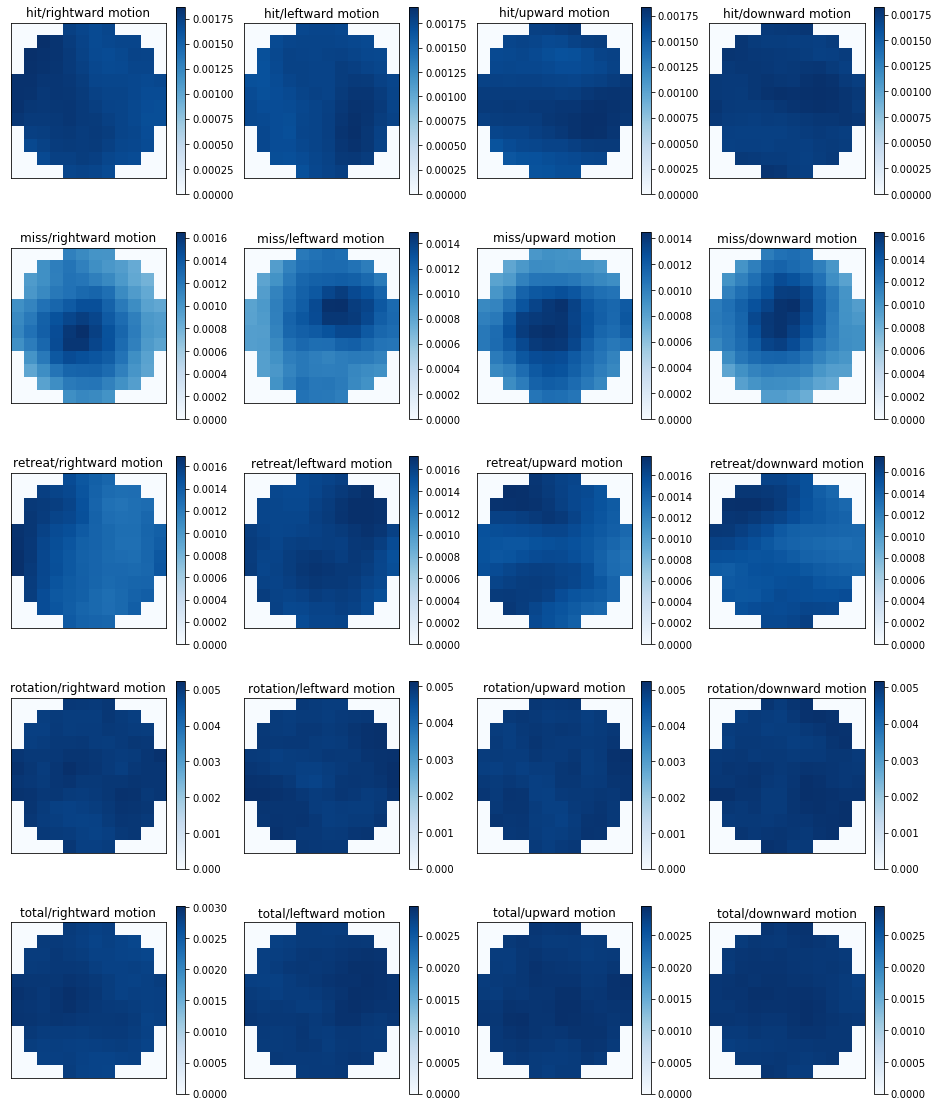

In [2]:
# Before running this cell, one needs to generate samples using 
# samples_generation_multi_units.py, 
# samples_generation_multi_units_run_scal200_smallM.py, 
# samples_generation_multi_units_run_scal200_largeM.py.
# Save the generated samples in path that one chooses.

# Average frames
importlib.reload(hpfn)

M = 1
K = 12
colormap = 'Blues'
savepath = '/Volumes/Baohua/data_on_hd/loom/multi_lplc2_D5_L4_exp/'
set_number = np.int(1000 + M)
data_types = ['hit', 'miss', 'retreat', 'rotation', 'total']
path = savepath + 'set_{}/training/'.format(set_number)

motion_types = ['rightward motion', 'leftward motion', 'upward motion', 'downward motion']
mask_d_null = np.full((K, K), False)

Ave_frames = hpfn.get_ave_frames(K, path, data_types)
filename = path + 'ave_UV_flow.pdf'

hpfn.plot_ave_samples(K, data_types, motion_types, Ave_frames, mask_d_null, colormap, filename)

# Average UV flow: a group of LPLC2 units

Number of frames for each type: [ 861440.  392608.  429568. 1024000. 2707616.].
The shape of the averaged frames is (5, 144, 4).


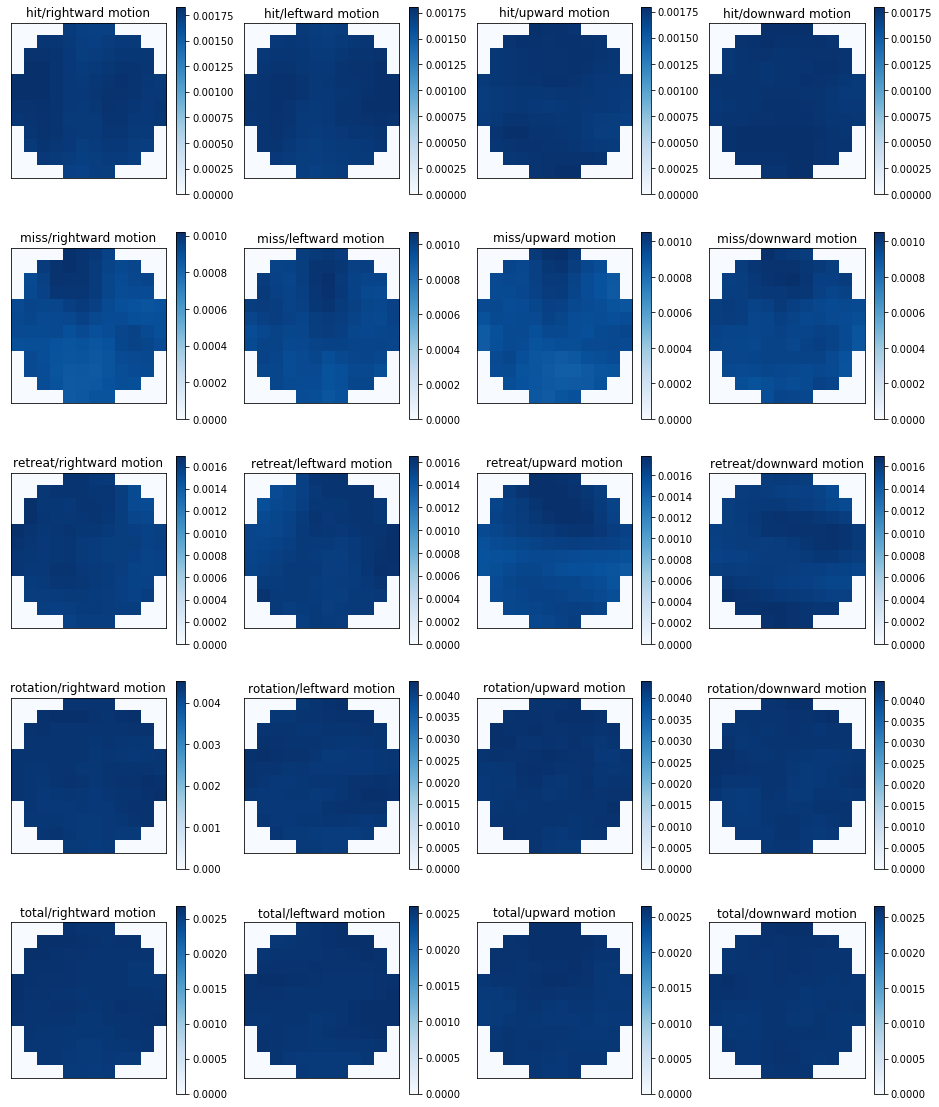

In [3]:
# Average UV flows
importlib.reload(hpfn)

%matplotlib inline

M = 32
K = 12
colormap = 'Blues'
savepath = '/Volumes/Baohua/data_on_hd/loom/multi_lplc2_D5_L4_exp/'
set_number = np.int(1000 + M)
data_types = ['hit', 'miss', 'retreat', 'rotation', 'total']
path = savepath+'set_{}/training/'.format(set_number)

motion_types = ['rightward motion', 'leftward motion', 'upward motion', 'downward motion']
mask_d_null = np.full((K, K), False)

Ave_frames = hpfn.get_ave_frames(K, path, data_types)
filename = path+'ave_UV_flow.pdf'

hpfn.plot_ave_samples(K, data_types, motion_types, Ave_frames, mask_d_null, colormap, filename)

# Average UV flows per unit

Number of frames for each type: 26767.
The shape of the averaged frames is (3, 144, 4).


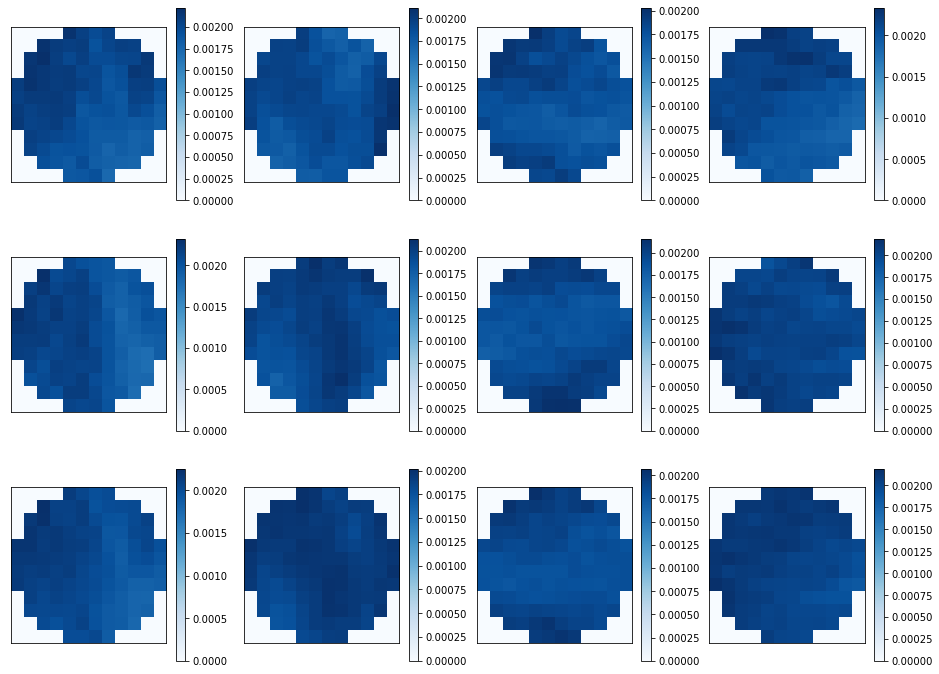

In [22]:
# Average UV flows per unit
importlib.reload(hpfn)

%matplotlib inline

M = 2
K = 12
colormap = 'Blues'
set_number = np.int(1000 + M)
data_path = f'/Volumes/Baohua/data_on_hd/loom/multi_lplc2_scal200_D5/set_{set_number}/training/'
data_types = ['hit', 'miss', 'retreat', 'rotation']
data_type = data_types[0]

motion_types = ['rightward motion', 'leftward motion', 'upward motion', 'downward motion']
mask_d_null = np.full((K, K), False)

intensity_UV = 'UV_flow_samples'
Ave_frames = hpfn.get_ave_frames_per_unit(K, M, data_path, data_type, intensity_UV)
filename = data_path+'ave_UV_flow_per_unit.pdf'

hpfn.plot_ave_samples_per_unit(K, motion_types, Ave_frames, mask_d_null, colormap, filename)

# Average frames per unit

Number of frames for each type: 27164.
The shape of the averaged frames is (17, 144, 1).


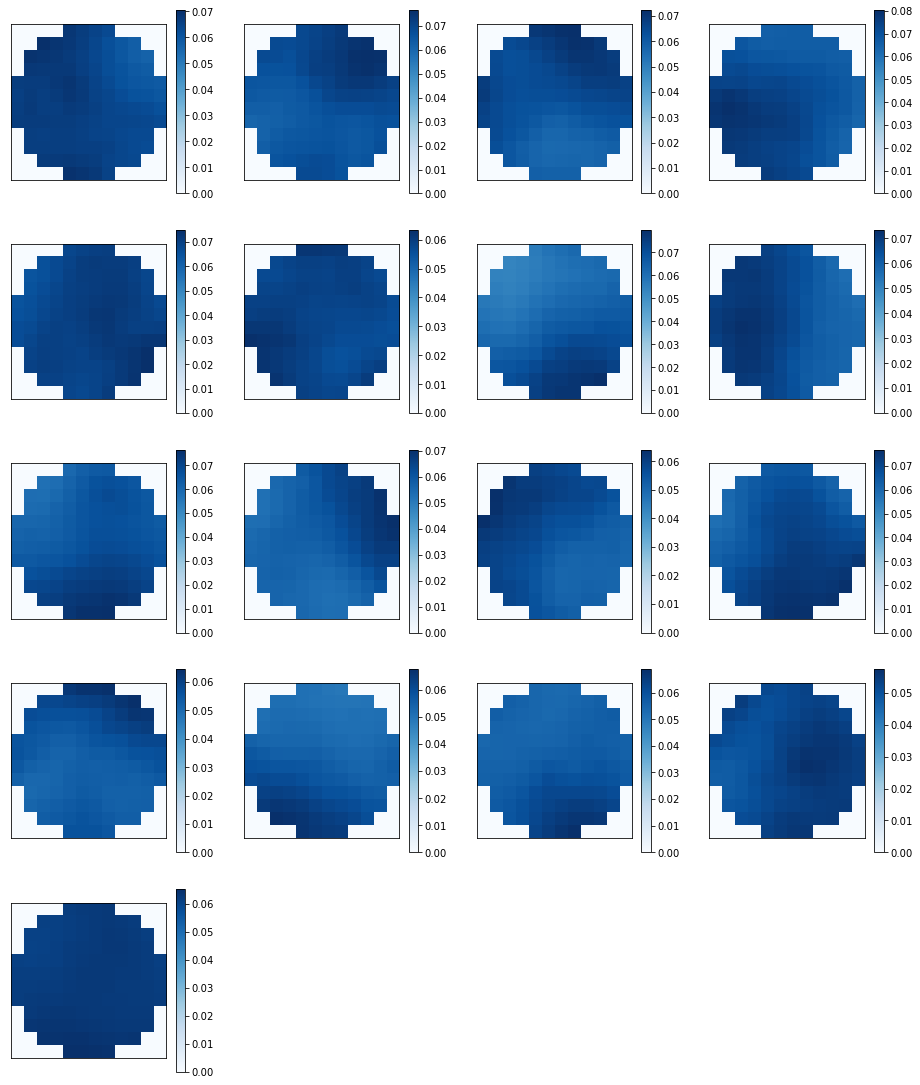

In [23]:
# Average frames per unit
importlib.reload(hpfn)

%matplotlib inline

K = 12
M = 16
colormap = 'Blues'
set_number = np.int(1000 + M)
data_path = f'/Volumes/Baohua/data_on_hd/loom/multi_lplc2_scal200_D5/set_{set_number}/training/'
data_types = ['hit', 'miss', 'retreat', 'rotation']
data_type = data_types[0]

motion_types = ['none']
mask_d_null = np.full((K, K), False)

intensity_UV = 'intensities_samples_cg'
Ave_frames = hpfn.get_ave_frames_per_unit(K, M, data_path, data_type, intensity_UV)
filename = path+'ave_frames_cg_per_unit.pdf'

hpfn.plot_ave_samples_per_unit(K, motion_types, Ave_frames, mask_d_null, colormap, filename)

# Check the distribution of HRC output

## Distribution of HRC output for training and testing sets

In [25]:
# Loading data

importlib.reload(hpfn)

M = 32
set_number = np.int(1000 + M)
data_path = '/Volumes/Baohua/data_on_hd/loom/multi_lplc2_scal200_D5/set_{}/'.format(set_number)
data_types = ['hit', 'miss', 'retreat', 'rotation']
save_path = data_path+'/train_test_set'
N_train, N_test, X_training, y_training, X_testing, y_testing = hpfn.get_velocity_train_test(data_path, data_types)
print(N_train)
print(N_test)

print(X_training.shape)
print(y_training.shape)

[1000  500  500 2000]
[300 150 150 600]
(4000, 32)
(4000, 1)


(1000,) (500,) (500,) (2000,)


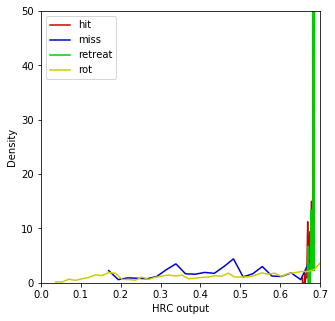

(300,) (150,) (150,) (600,)


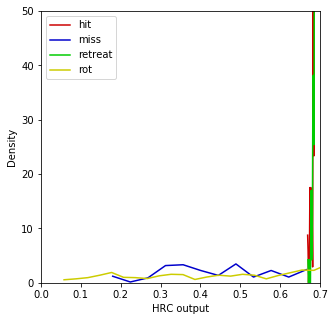

In [29]:
# Distribution for max of all M for the max of each trajetory

%matplotlib inline
importlib.reload(hpfn)

arr_list0 = [X_training.max(axis=1)[:N_train[0]], \
             X_training.max(axis=1)[N_train[0]:N_train[0]+N_train[1]], \
             X_training.max(axis=1)[N_train[0]+N_train[1]:N_train[0]+N_train[1]+N_train[2]], 
             X_training.max(axis=1)[N_train[0]+N_train[1]+N_train[2]:]]
print(arr_list0[0].shape, arr_list0[1].shape, arr_list0[2].shape, arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8, 0, 0], [0, 0, 0.8], [0, 0.8, 0], [0.8, 0.8, 0]]
legend_list = ['hit', 'miss', 'retreat', 'rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 50.
fig = hpfn.plot_all_hists(arr_list, color_list, legend_list, y_scal, xl, xu, yl, yu)
# fig.savefig('../results/FiguresForPaper/Figure_2/distribution_train_hit_retreat.png')

arr_list0 = [X_testing.max(axis=1)[:N_test[0]], \
             X_testing.max(axis=1)[N_test[0]:N_test[0]+N_test[1]], \
             X_testing.max(axis=1)[N_test[0]+N_test[1]:N_test[0]+N_test[1]+N_test[2]], 
             X_testing.max(axis=1)[N_test[0]+N_test[1]+N_test[2]:]]
print(arr_list0[0].shape, arr_list0[1].shape, arr_list0[2].shape, arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8, 0, 0], [0, 0, 0.8], [0, 0.8, 0], [0.8, 0.8, 0]]
legend_list = ['hit', 'miss', 'retreat', 'rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 50.
fig = hpfn.plot_all_hists(arr_list, color_list, legend_list, y_scal, xl, xu, yl, yu)
# fig.savefig(data_path+'training/distribution_HRC_output_max_perTraj.pdf')


(1000, 32) (500, 32) (500, 32) (2000, 32)


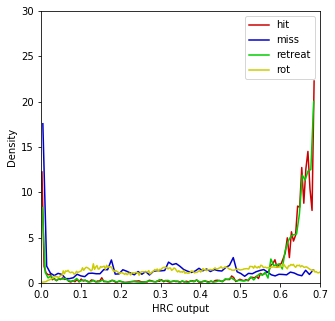

(300, 32) (150, 32) (150, 32) (600, 32)


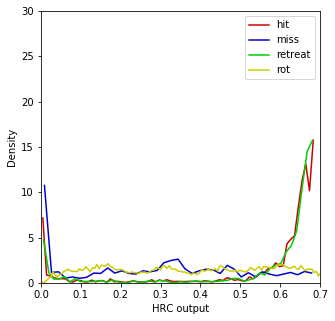

In [30]:
# Distribution for max of each trajectory

%matplotlib inline
importlib.reload(hpfn)

arr_list0 = [X_training[:N_train[0]], \
             X_training[N_train[0]:N_train[0]+N_train[1]], \
             X_training[N_train[0]+N_train[1]:N_train[0]+N_train[1]+N_train[2]], 
             X_training[N_train[0]+N_train[1]+N_train[2]:]]
print(arr_list0[0].shape, arr_list0[1].shape, arr_list0[2].shape, arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8, 0, 0], [0, 0, 0.8], [0, 0.8, 0], [0.8, 0.8, 0]]
legend_list = ['hit', 'miss', 'retreat', 'rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 30.
fig = hpfn.plot_all_hists(arr_list, color_list, legend_list, y_scal, xl, xu, yl, yu)
# fig.savefig('../results/FiguresForPaper/Figure_2/distribution_train_L4_scal200_Q25_2.png')

arr_list0 = [X_testing[:N_test[0]], \
             X_testing[N_test[0]:N_test[0]+N_test[1]], \
             X_testing[N_test[0]+N_test[1]:N_test[0]+N_test[1]+N_test[2]], 
             X_testing[N_test[0]+N_test[1]+N_test[2]:]]
print(arr_list0[0].shape, arr_list0[1].shape, arr_list0[2].shape, arr_list0[3].shape)
arr_list = []
for arr in arr_list0:
    arr_list.append(arr[arr!=0])
color_list = [[0.8, 0, 0], [0, 0, 0.8], [0, 0.8, 0], [0.8, 0.8, 0]]
legend_list = ['hit', 'miss', 'retreat', 'rot']
y_scal = 'linear'
xl = 0.
xu = 0.7
yl = 0.
yu = 30.
fig = hpfn.plot_all_hists(arr_list, color_list, legend_list, y_scal, xl, xu, yl, yu)
# fig.savefig(data_path+'training/distribution_HRC_output_max_perQ.pdf')


In [5]:
# All HRC output

importlib.reload(hpfn)

M = 32
set_number = np.int(1000 + M)
data_path = '/Volumes/Baohua/data_on_hd/loom/multi_lplc2_scal200_D5/set_{}/'.format(set_number)
data_types = ['hit', 'miss', 'retreat', 'rotation']

V_hit, V_miss, V_retreat, V_rotation = hpfn.get_velocity_all(data_path, data_types)


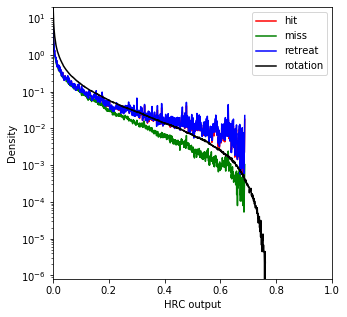

In [8]:
importlib.reload(hpfn)

arr_list = [V_hit, V_miss, V_retreat, V_rotation]
color_list = ['r', 'g', 'b', 'k']
legend_list = ['hit', 'miss', 'retreat', 'rotation']
y_scal = 'log'
xl = 0.
xu = 1.0
yl = 0.
yu = 20.
fig = hpfn.plot_all_hists(arr_list, color_list, legend_list, y_scal, xl, xu, yl, yu)
# fig.savefig(data_path+'training/distribution_HRC_output_all.pdf')
